#Loading data into Pandas DataFrame

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf
import plotly.express as px

import plotly.graph_objects as go

In [3]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

cf.go_offline()

In [4]:
! pip install -q plotly cufflinks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.2 MB/s eta 0:00:00


In [5]:
! gdown --id 1XOp8-KWGP42_NXO2zUY-FmcRW_iJACsB


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1XOp8-KWGP42_NXO2zUY-FmcRW_iJACsB
To: /content/university_rankings.csv
100% 174k/174k [00:00<00:00, 67.7MB/s]


In [6]:
df = pd.read_csv("/content/university_rankings.csv")
df


Rank                             University         Country  \
0            1                   University of Oxford  United Kingdom   
1            2                     Harvard University   United States   
2           =3                University of Cambridge  United Kingdom   
3           =3                    Stanford University   United States   
4            5  Massachusetts Institute of Technology   United States   
...        ...                                    ...             ...   
2340  Reporter                York St John University  United Kingdom   
2341  Reporter    Yusuf Maitama Sule University, Kano         Nigeria   
2342  Reporter  Zhytomyr Polytechnic State University         Ukraine   
2343  Reporter                    Ziauddin University        Pakistan   
2344  Reporter                       Zarqa University          Jordan   

     Number of Students  Students per staff International Students Female:Male  
0                20,965                10.6                    42%     48 : 52  
1                21,887                 9.6                    25%     50 : 50  
2                20,185                11.3                    39%     47 : 53  
3                16,164                 7.1                    24%     46 : 54  
4                11,415                 8.2                    33%     40 : 60  
...                 ...                 ...                    ...         ...  
2340              6,315                18.6                    12%     65 : 35  
2341             12,880                33.0                     0%     48 : 52  
2342              3,869                15.4                     1%     34 : 66  
2343              4,906                 8.8                     1%     63 : 37  
2344              5,768                18.1                    32%     47 : 53  

[2345 rows x 7 columns]

#Data Cleaning, Processing, Transformation
#Check missing value

In [7]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Rank                       0
University                 0
Country                    1
Number of Students         0
Students per staff         1
International Students     0
Female:Male               90
dtype: int64


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df['Rank'] = df['Rank'].str.replace('=', '')

In [10]:
# Fill missing values with the mean of the column
df['Country'].fillna(df['Country'].mode()[0], inplace=True)
df['Students per staff'].fillna(df['Students per staff'].mean(), inplace=True)
# Fill missing values in 'Female:Male' column with a custom value
df['Female:Male'].fillna('50:50', inplace=True)

# Alternatively, I split the column into separate 'Female' and 'Male' columns
# and then impute missing values for each gender separately
df[['Female', 'Male']] = df['Female:Male'].str.split(':', expand=True)
df['Female'].fillna(df['Female'].median(), inplace=True)  # Impute missing values for 'Female' column
df['Male'].fillna(df['Male'].median(), inplace=True)  # Impute missing values for 'Male' column


In [11]:
df = df.reset_index(drop=True)
df

Rank                             University         Country  \
0            1                   University of Oxford  United Kingdom   
1            2                     Harvard University   United States   
2            3                University of Cambridge  United Kingdom   
3            3                    Stanford University   United States   
4            5  Massachusetts Institute of Technology   United States   
...        ...                                    ...             ...   
2340  Reporter                York St John University  United Kingdom   
2341  Reporter    Yusuf Maitama Sule University, Kano         Nigeria   
2342  Reporter  Zhytomyr Polytechnic State University         Ukraine   
2343  Reporter                    Ziauddin University        Pakistan   
2344  Reporter                       Zarqa University          Jordan   

     Number of Students  Students per staff International Students  \
0                20,965                10.6                    42%   
1                21,887                 9.6                    25%   
2                20,185                11.3                    39%   
3                16,164                 7.1                    24%   
4                11,415                 8.2                    33%   
...                 ...                 ...                    ...   
2340              6,315                18.6                    12%   
2341             12,880                33.0                     0%   
2342              3,869                15.4                     1%   
2343              4,906                 8.8                     1%   
2344              5,768                18.1                    32%   

     Female:Male Female Male  
0        48 : 52    48    52  
1        50 : 50    50    50  
2        47 : 53    47    53  
3        46 : 54    46    54  
4        40 : 60    40    60  
...          ...    ...  ...  
2340     65 : 35    65    35  
2341     48 : 52    48    52  
2342     34 : 66    34    66  
2343     63 : 37    63    37  
2344     47 : 53    47    53  

[2345 rows x 9 columns]

In [12]:
df['Rank'] = df['Rank'].str.replace('=', '') #Data Transformation
df

Rank                             University         Country  \
0            1                   University of Oxford  United Kingdom   
1            2                     Harvard University   United States   
2            3                University of Cambridge  United Kingdom   
3            3                    Stanford University   United States   
4            5  Massachusetts Institute of Technology   United States   
...        ...                                    ...             ...   
2340  Reporter                York St John University  United Kingdom   
2341  Reporter    Yusuf Maitama Sule University, Kano         Nigeria   
2342  Reporter  Zhytomyr Polytechnic State University         Ukraine   
2343  Reporter                    Ziauddin University        Pakistan   
2344  Reporter                       Zarqa University          Jordan   

     Number of Students  Students per staff International Students  \
0                20,965                10.6                    42%   
1                21,887                 9.6                    25%   
2                20,185                11.3                    39%   
3                16,164                 7.1                    24%   
4                11,415                 8.2                    33%   
...                 ...                 ...                    ...   
2340              6,315                18.6                    12%   
2341             12,880                33.0                     0%   
2342              3,869                15.4                     1%   
2343              4,906                 8.8                     1%   
2344              5,768                18.1                    32%   

     Female:Male Female Male  
0        48 : 52    48    52  
1        50 : 50    50    50  
2        47 : 53    47    53  
3        46 : 54    46    54  
4        40 : 60    40    60  
...          ...    ...  ...  
2340     65 : 35    65    35  
2341     48 : 52    48    52  
2342     34 : 66    34    66  
2343     63 : 37    63    37  
2344     47 : 53    47    53  

[2345 rows x 9 columns]

#Visualization with plotly

##Line Chart

In [37]:
px.line(df, x='Rank', y='Students per staff').show(renderer="colab")

In [38]:
px.line(df, x='Rank', y='Number of Students').show(renderer="colab")

In [39]:
px.line(df, x='Rank', y='International Students').show(renderer="colab")

In [40]:
import plotly.graph_objects as go

px.line(df, x='Rank', y=['Female', 'Male',], title="RANK vs Female Male Ratio").show(renderer="colab")

### Bar Plots

In [41]:
country_cnt = df['Country'].value_counts().to_dict()
countries = list(country_cnt.keys())
cnt = list(country_cnt.values())

px.bar(x=countries, y=cnt, labels = {"x": "Country", "y": "Count"}).show(renderer="colab")

## Histogram

In [42]:
px.histogram(df, x='Number of Students', nbins=50).show(renderer="colab")

##Boxplots

In [47]:
px.box(df, y=['Number of Students', 'International Student'], points='all').show(renderer="colab")

##Violin Plot

In [48]:
px.violin(df, y=['Number of Students','International Student'], points='all').show(renderer="colab")

##Scatter Plot

In [53]:
px.scatter(df, x="Number of Students", y="International Students", color="Country", size='Students per staff', hover_data=['Rank', 'University', 'Country']).show(renderer="colab")

# Data visualization using Matplotlib

## Line Chart

In [13]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

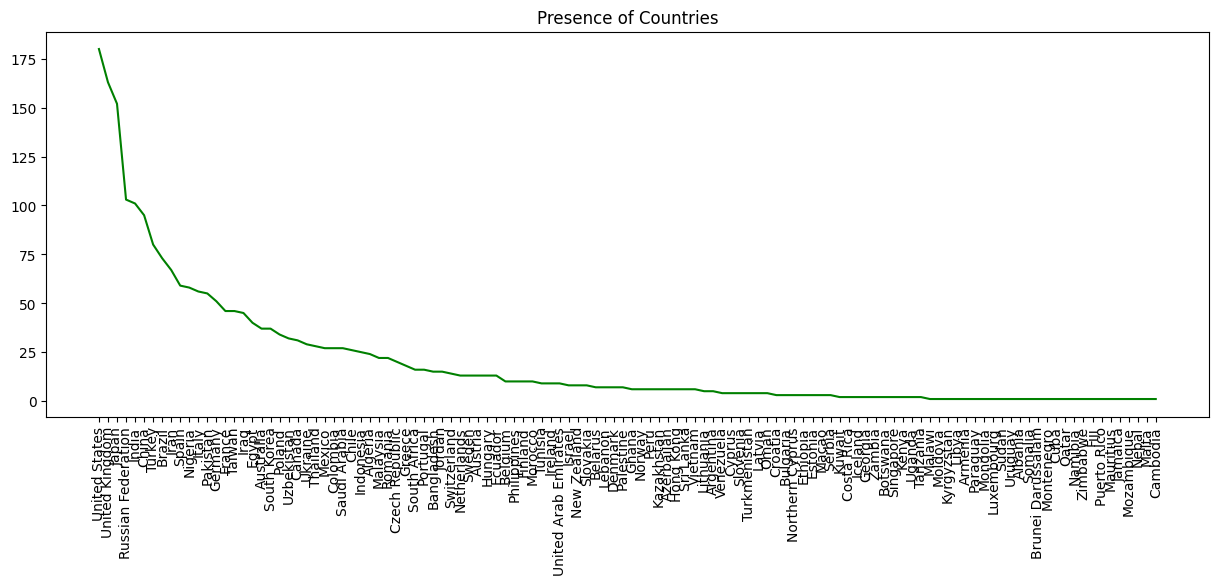

In [14]:
country_cnt = df['Country'].value_counts().to_dict()

countries = list(country_cnt.keys())
cnt = list(country_cnt.values())

plt.rcParams["figure.figsize"] = (15,5)

plt.title("Presence of Countries")

plt.plot(cnt,'g')

plt.xticks(ticks=range(len(countries)),labels=countries, rotation='vertical')

plt.show()

## Bar Plot

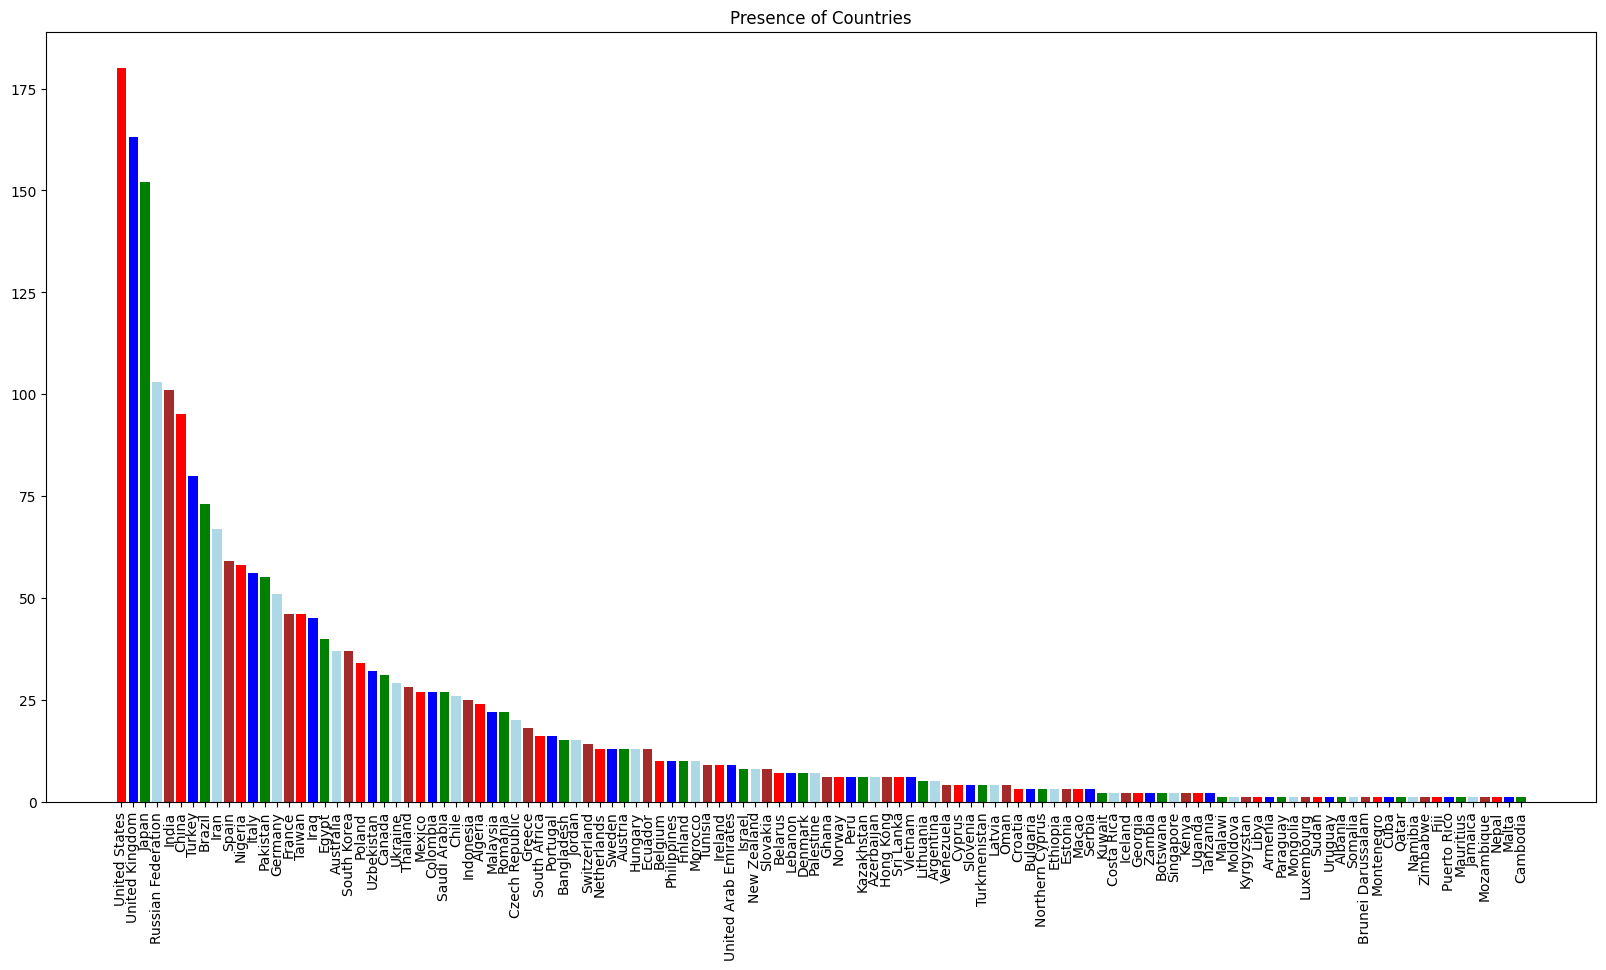

In [15]:
country_cnt = df['Country'].value_counts().to_dict()

countries = list(country_cnt.keys())
cnt = list(country_cnt.values())

plt.rcParams["figure.figsize"] = (20,10)

plt.xticks(ticks=range(len(countries)),labels=countries, rotation='vertical')

plt.title("Presence of Countries")

plt.bar(countries,cnt,color=['red','blue','green','lightblue', 'brown'])

plt.show()

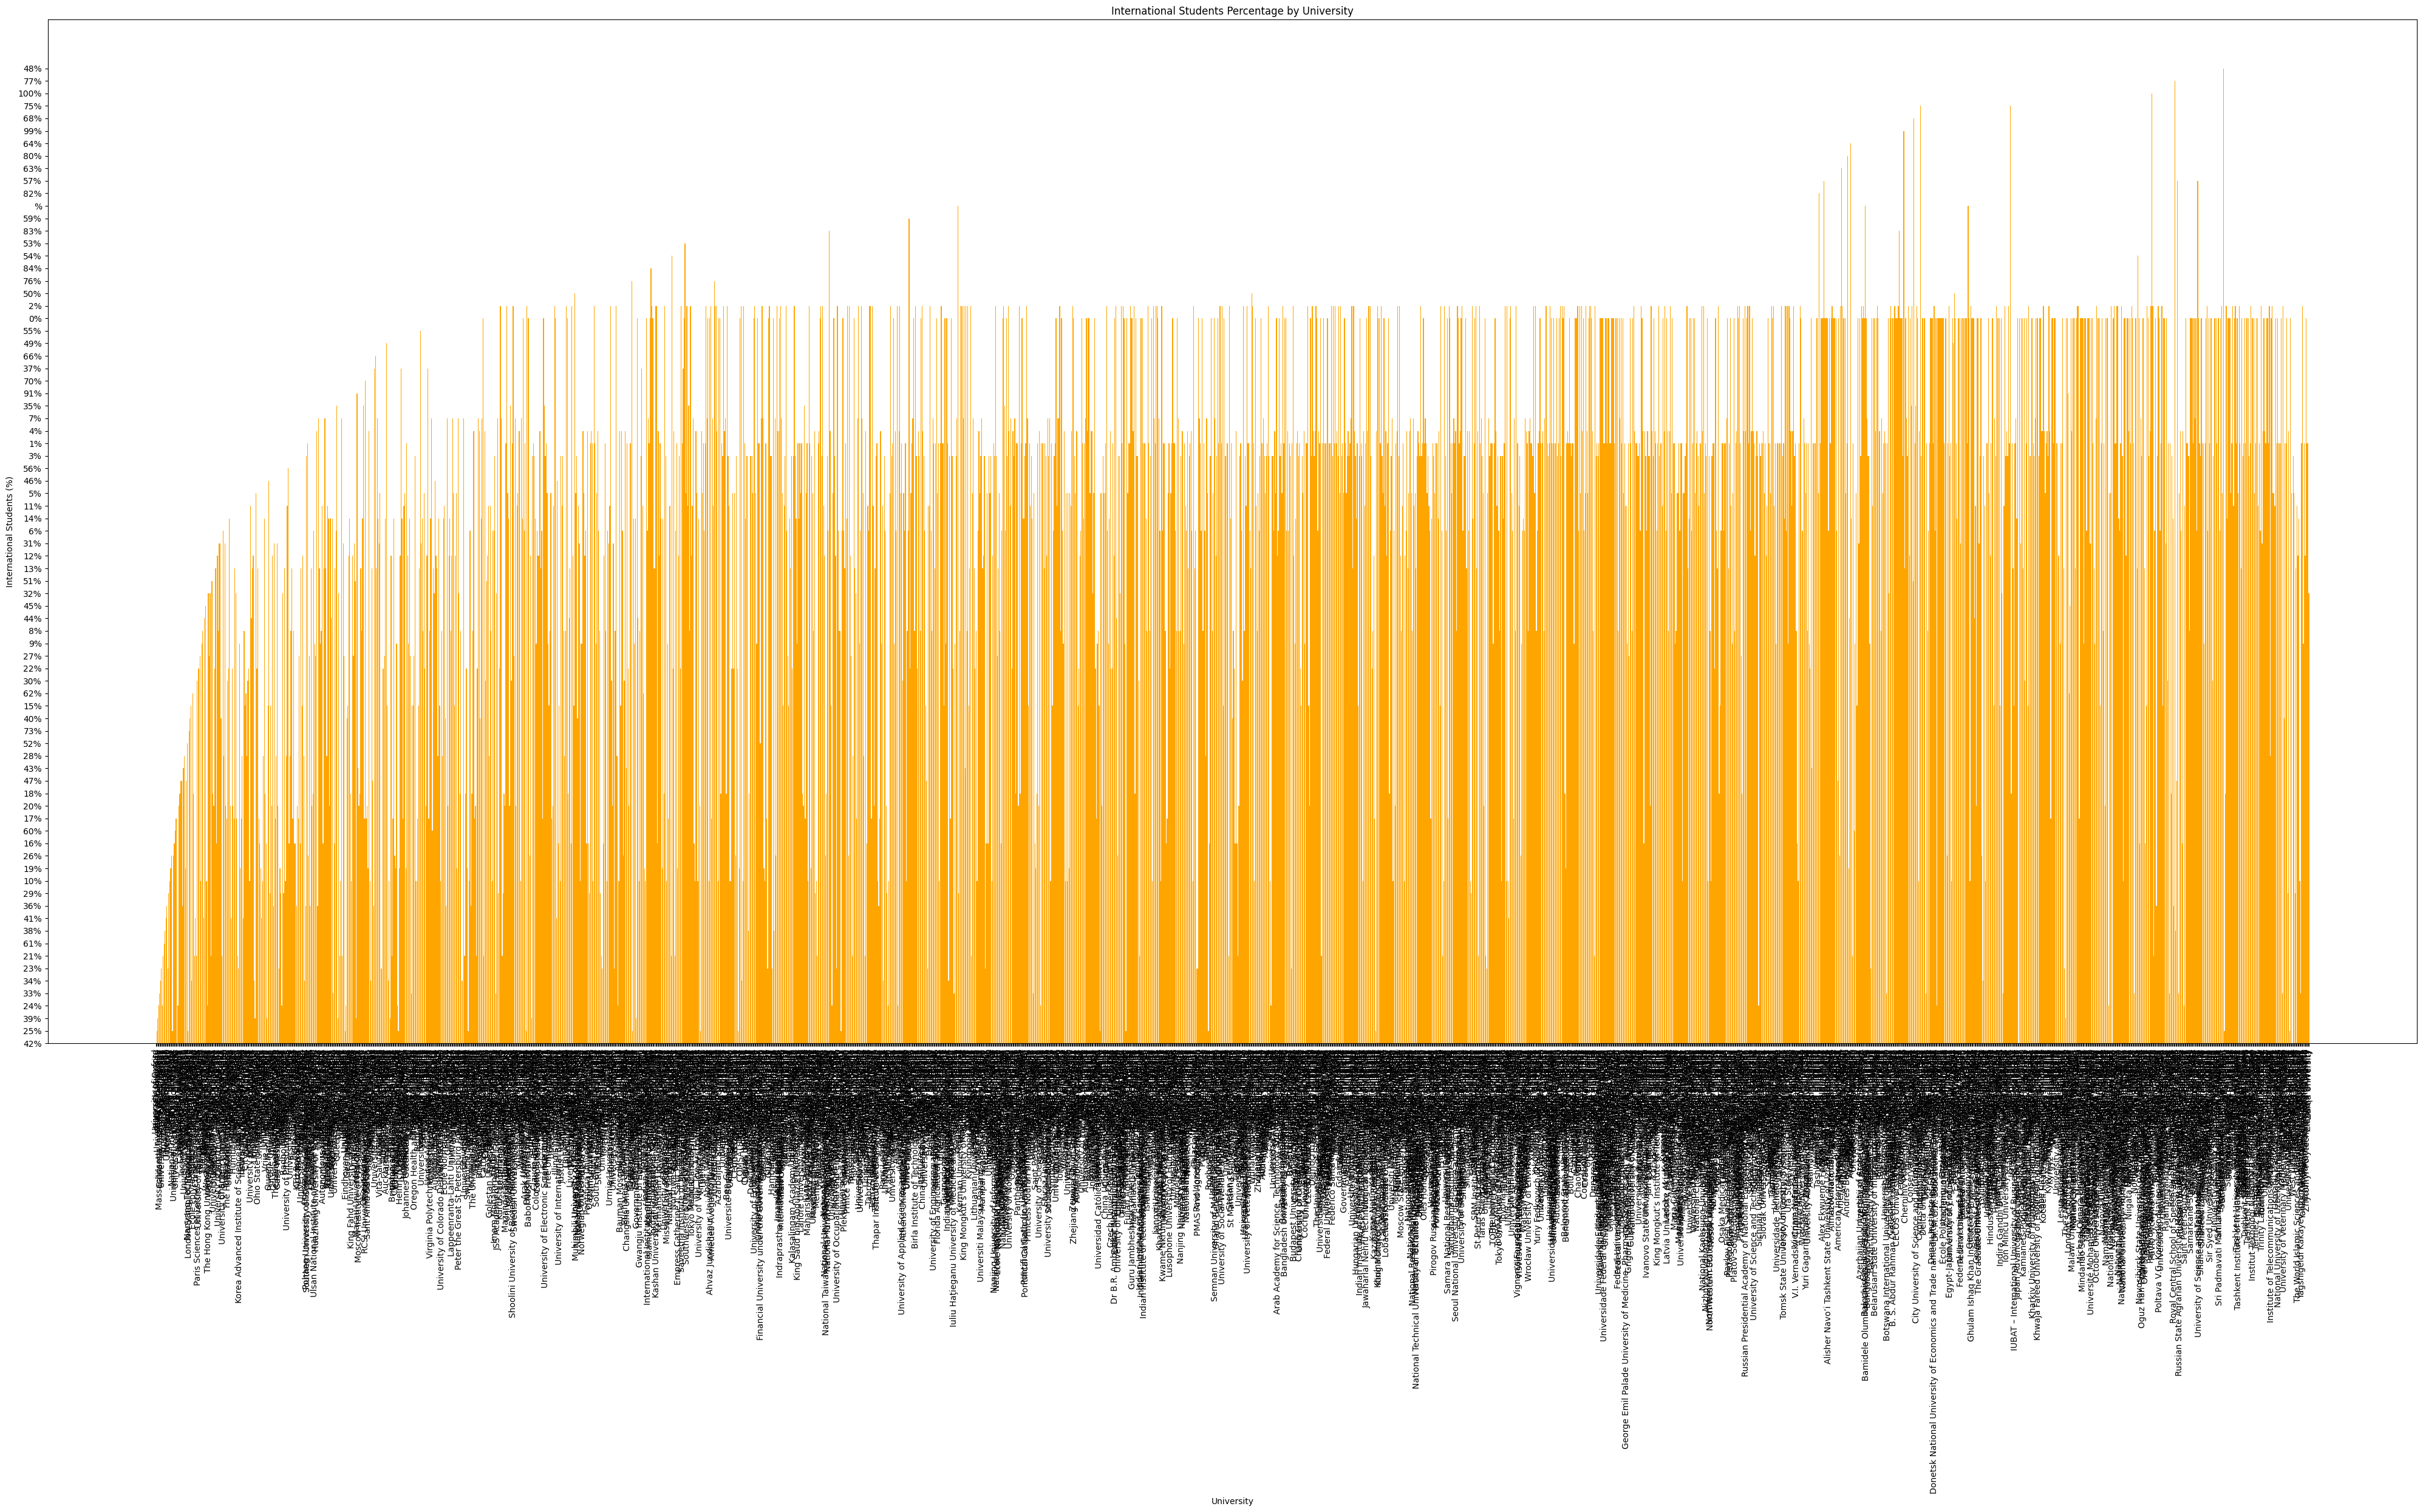

In [16]:
plt.figure(figsize=(40, 25))
plt.bar(df['University'], df['International Students'], color='orange')

# Customize the plot
plt.xlabel('University')
plt.ylabel('International Students (%)')
plt.title('International Students Percentage by University')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

## Histogram

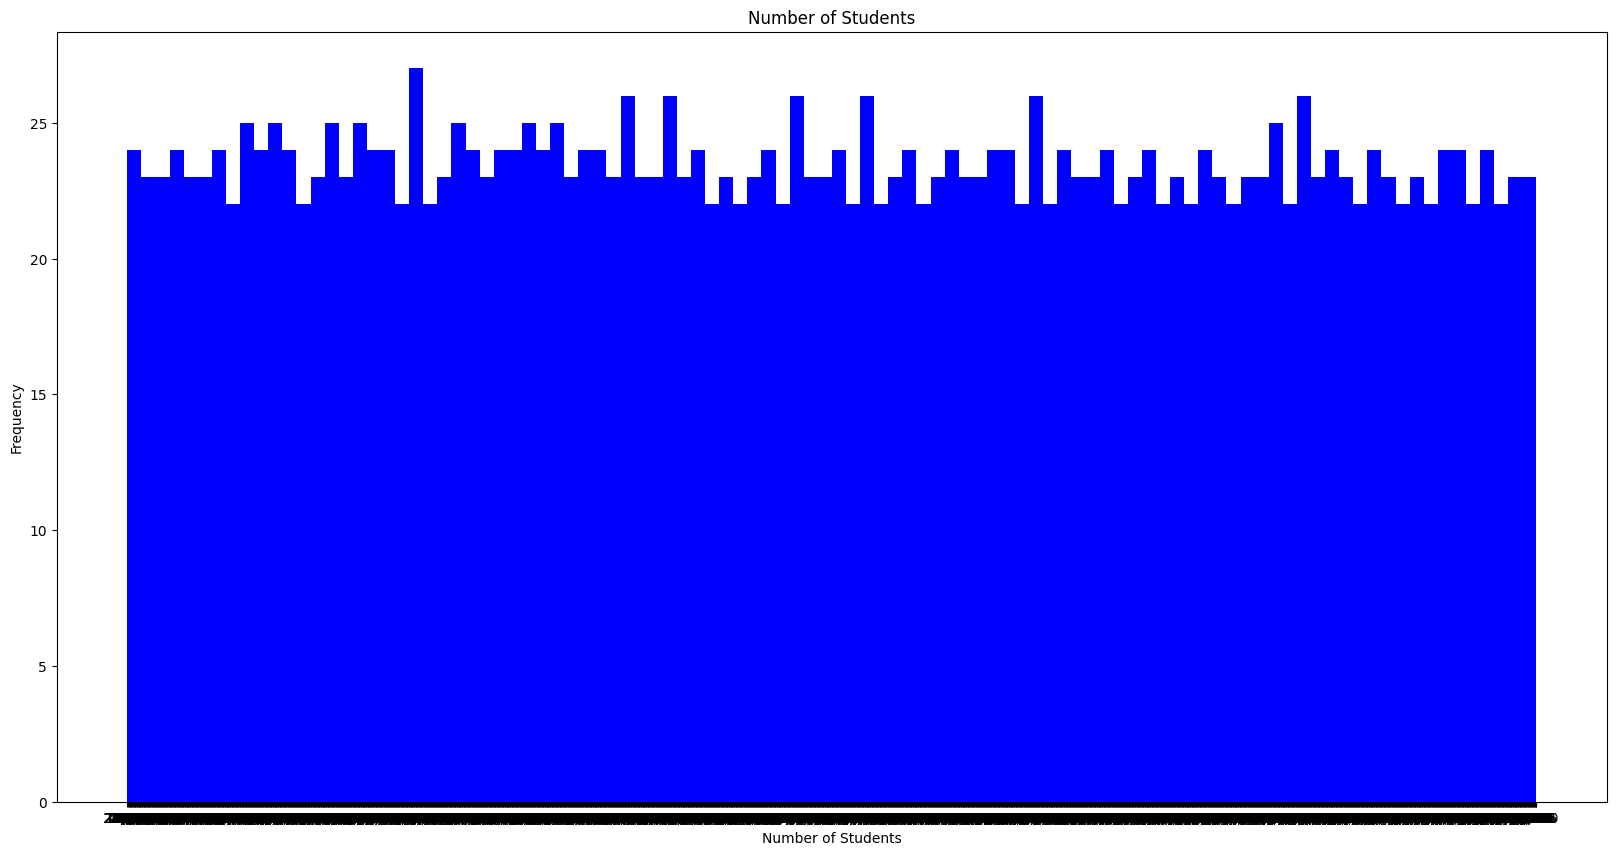

In [17]:
plt.title("Number of Students")

plt.xlabel('Number of Students')

plt.rcParams["figure.figsize"] = (10,5)

plt.ylabel('Frequency')

plt.hist(df['Number of Students'],bins=100,color='blue')

plt.show()

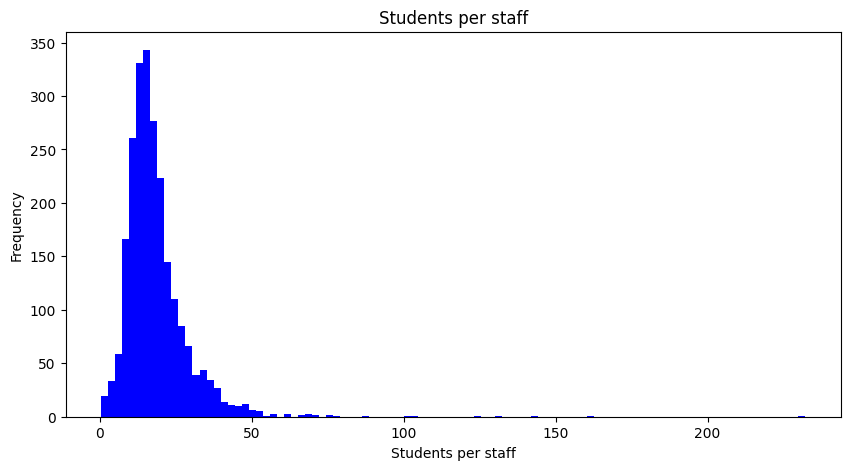

In [18]:
plt.title("Students per staff")

plt.xlabel('Students per staff')

plt.rcParams["figure.figsize"] = (10,5)

plt.ylabel('Frequency')

plt.hist(df['Students per staff'],bins=100,color='blue')

plt.show()

## Box Plots

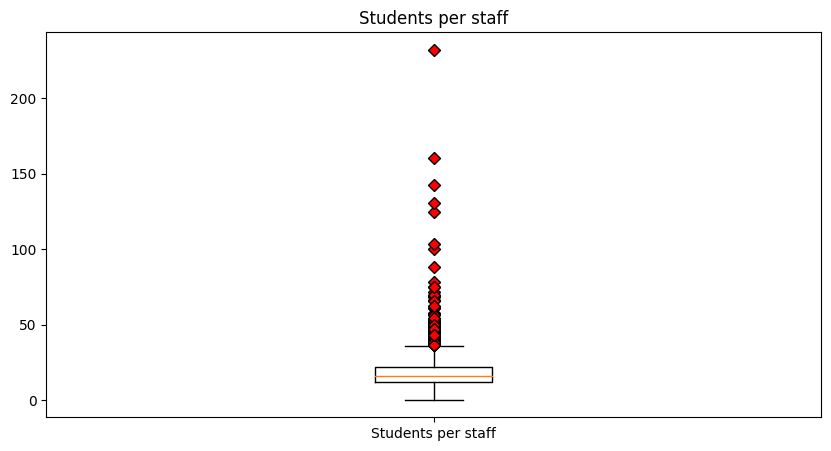

In [19]:
outliers = dict(markerfacecolor = 'r', marker = 'D')
plt.title('Students per staff')
plt.boxplot(df['Students per staff'],labels=['Students per staff'],flierprops=outliers)
plt.show()

## Scatter Plots

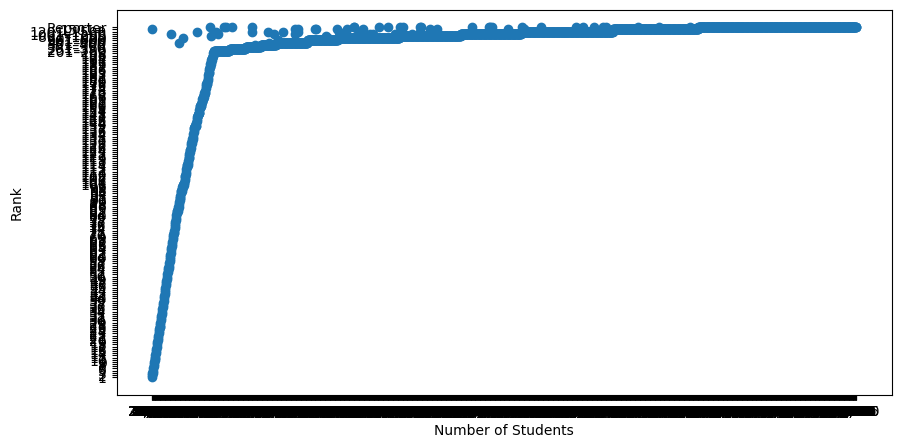

In [20]:
plt.xlabel('Number of Students')
plt.ylabel('Rank')

plt.scatter(df['Number of Students'],df['Rank'])

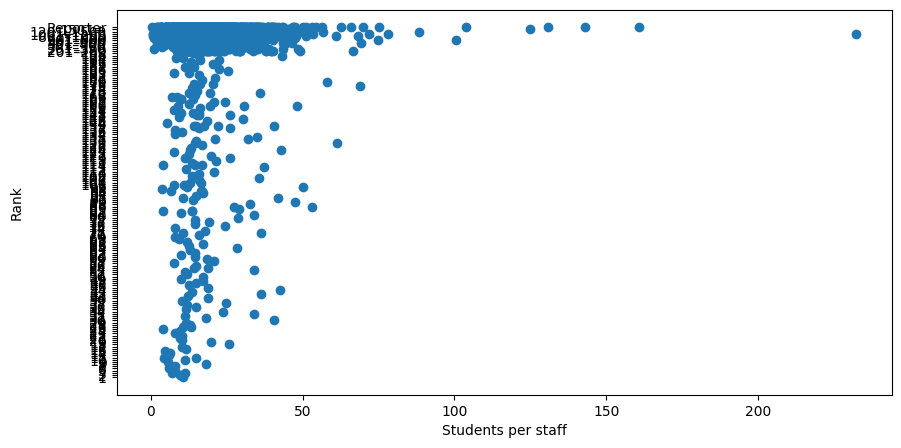

In [21]:
plt.xlabel('Students per staff')
plt.ylabel('Rank')

plt.scatter(df['Students per staff'],df['Rank'])

#Visualizion with seaborn

## Histogram

In [22]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

<Axes: xlabel='Number of Students', ylabel='Count'>

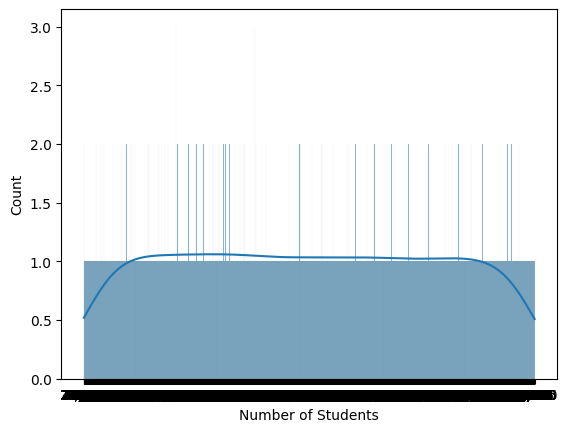

In [23]:
sns.histplot(df['Number of Students'],kde=True)

<Axes: xlabel='International Students', ylabel='Count'>

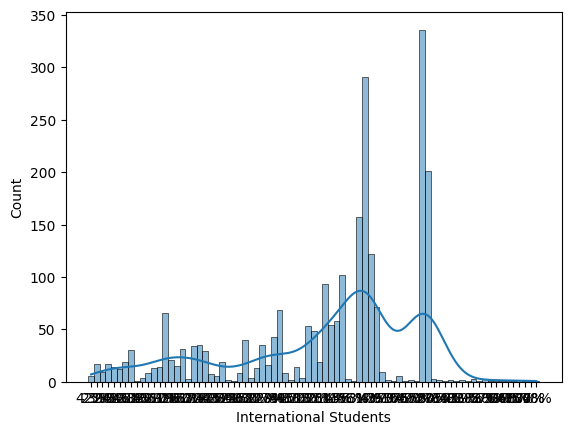

In [24]:
sns.histplot(df['International Students'],kde=True)

<Axes: xlabel='Students per staff', ylabel='Count'>

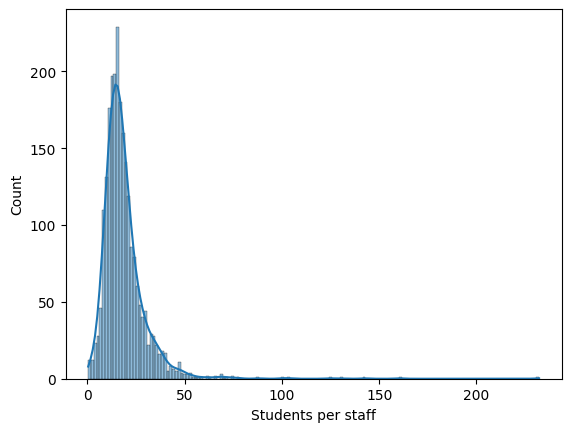

In [25]:
sns.histplot(df['Students per staff'],kde=True)

## Scatter Plots

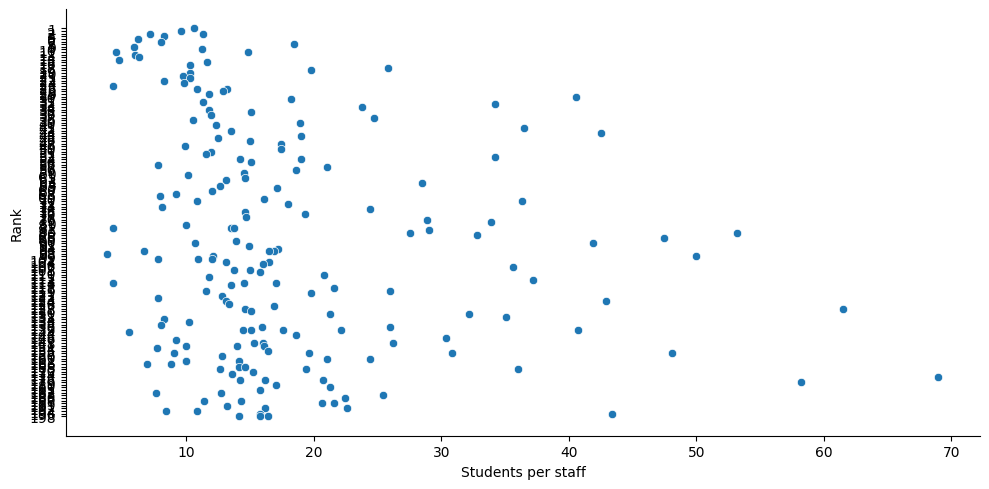

In [26]:
sns.relplot(x="Students per staff",y="Rank",data=df[:200],kind='scatter',height=5,aspect=2);

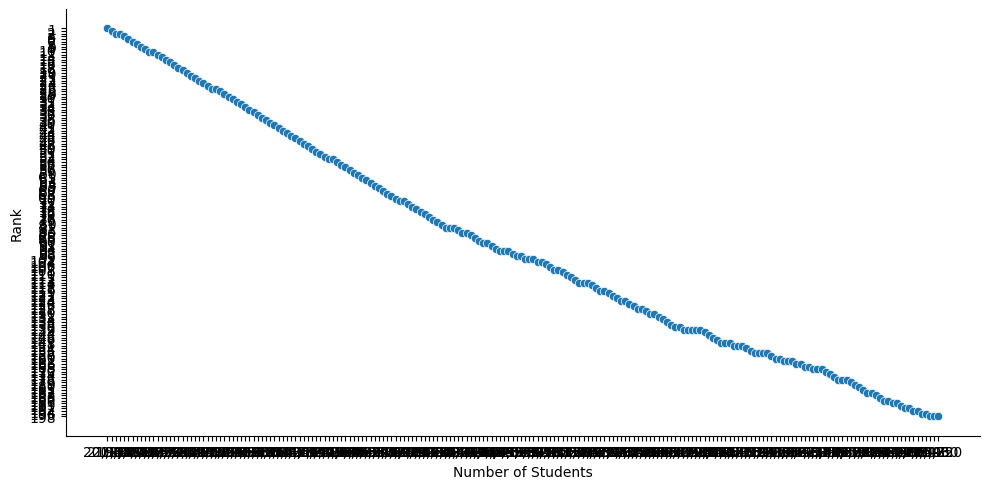

In [27]:
sns.relplot(x="Number of Students",y="Rank",data=df[:200],kind='scatter',height=5,aspect=2);

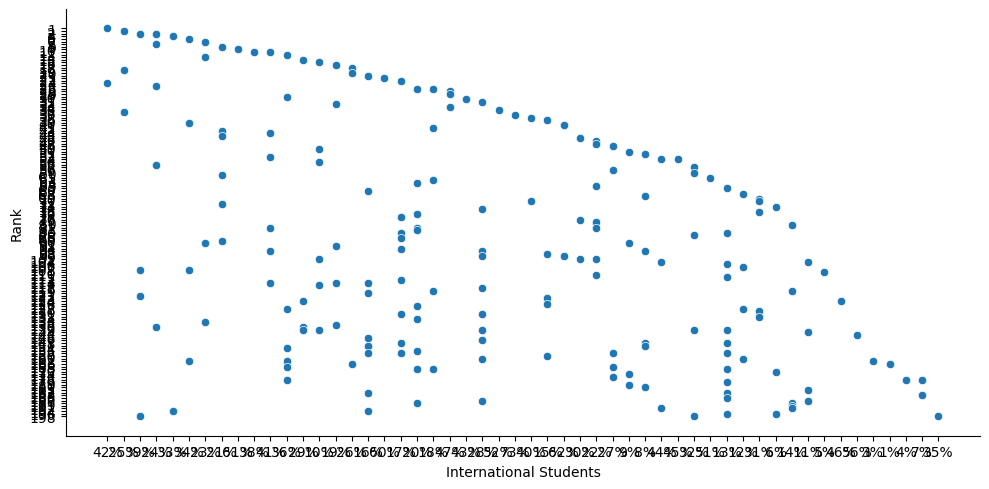

In [28]:
sns.relplot(x="International Students",y="Rank",data=df[:200],kind='scatter',height=5,aspect=2);

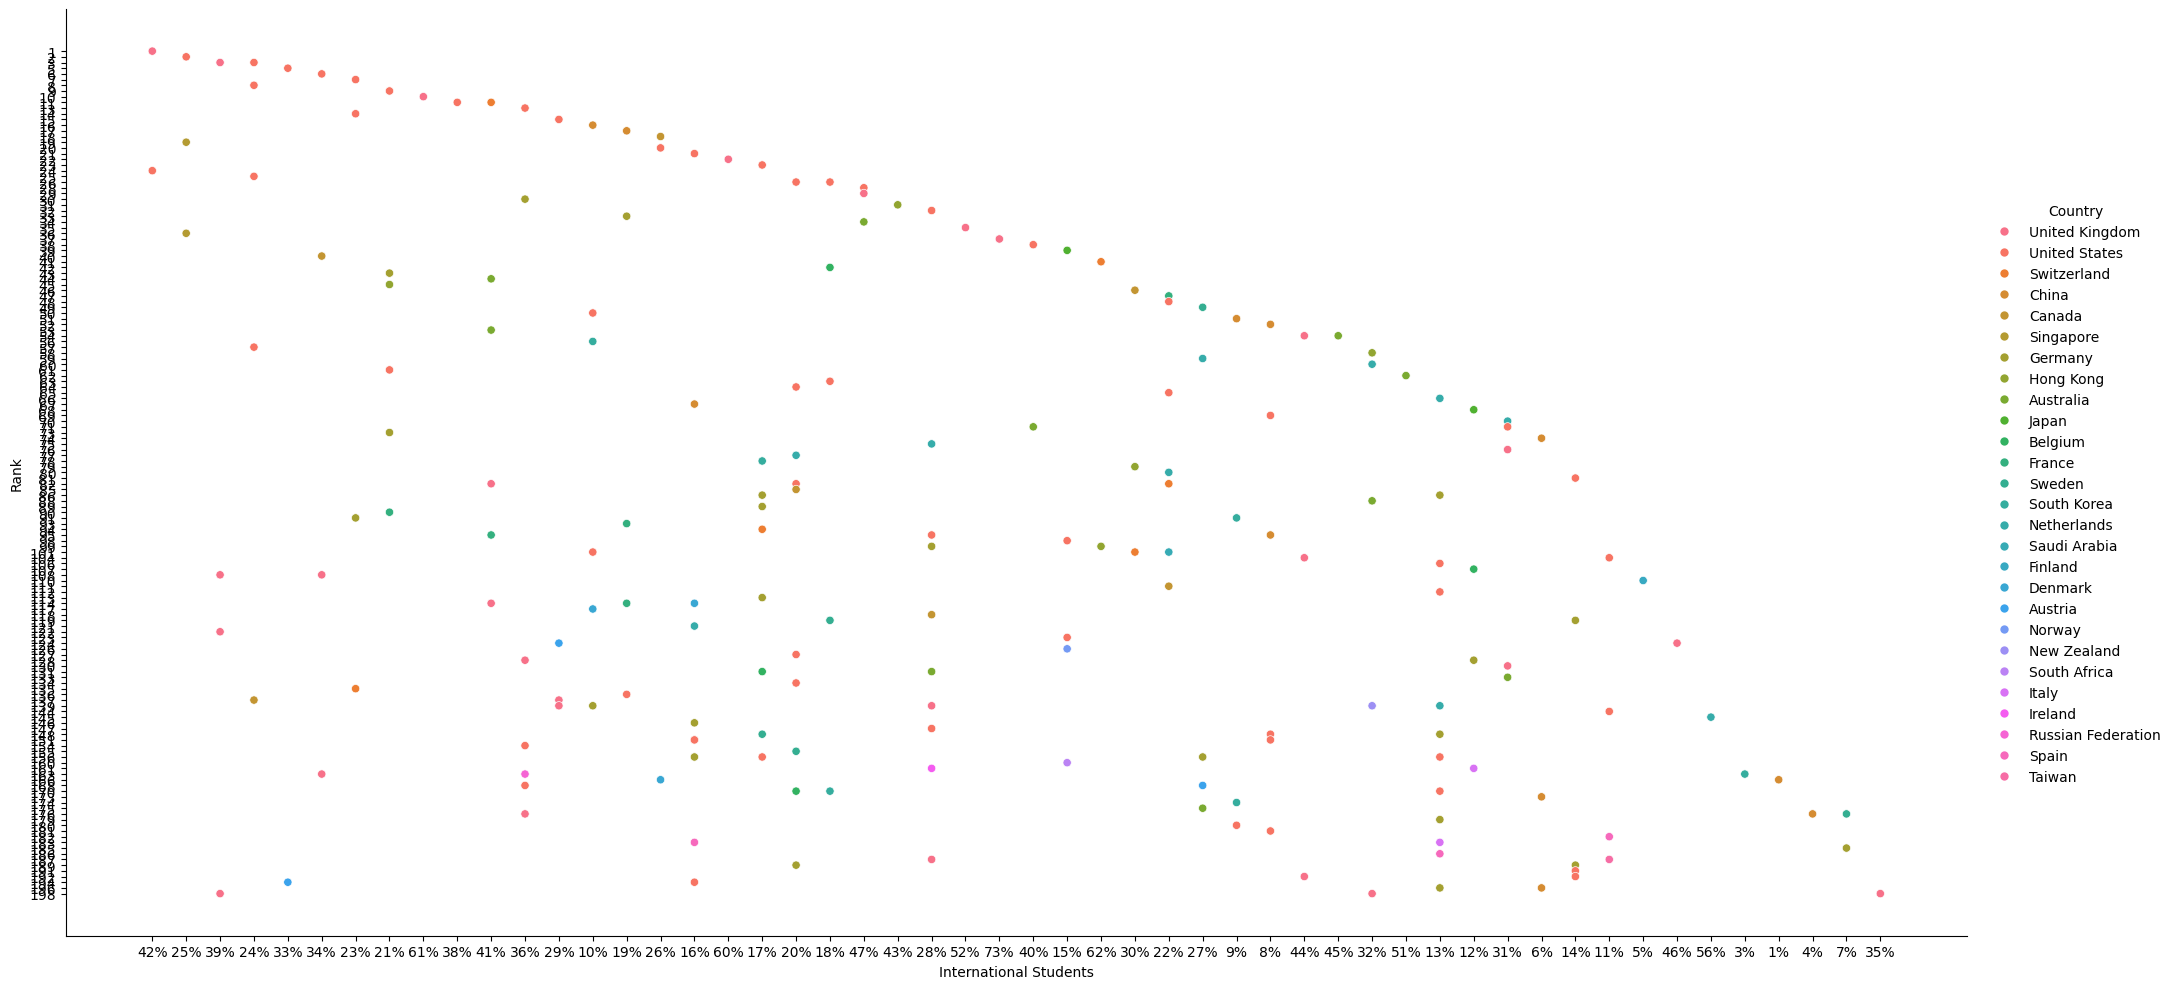

In [29]:
sns.relplot(x="International Students",y="Rank",hue="Country",data=df[:200],height=10,aspect=2);

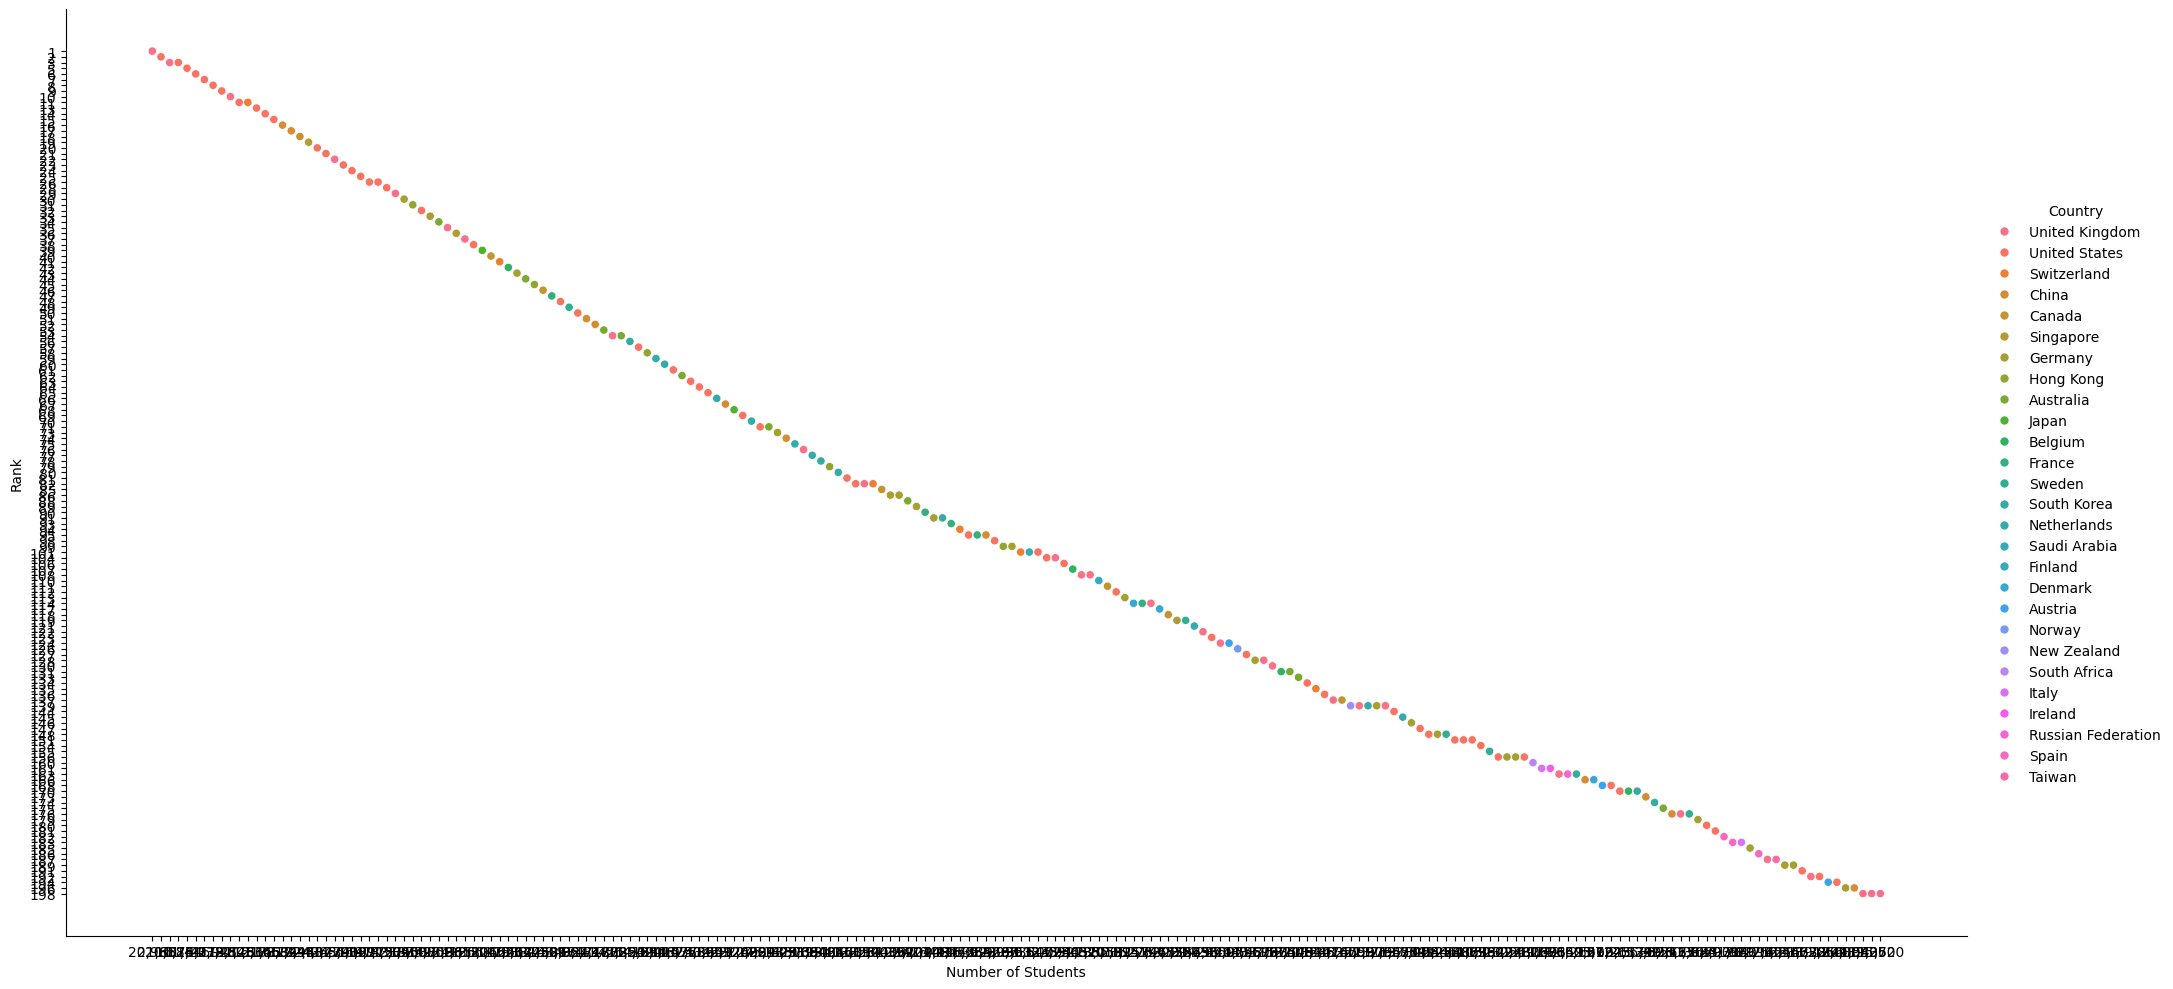

In [30]:
sns.relplot(x="Number of Students",y="Rank",hue="Country",data=df[:200],height=10,aspect=2);

## Bubble Plot

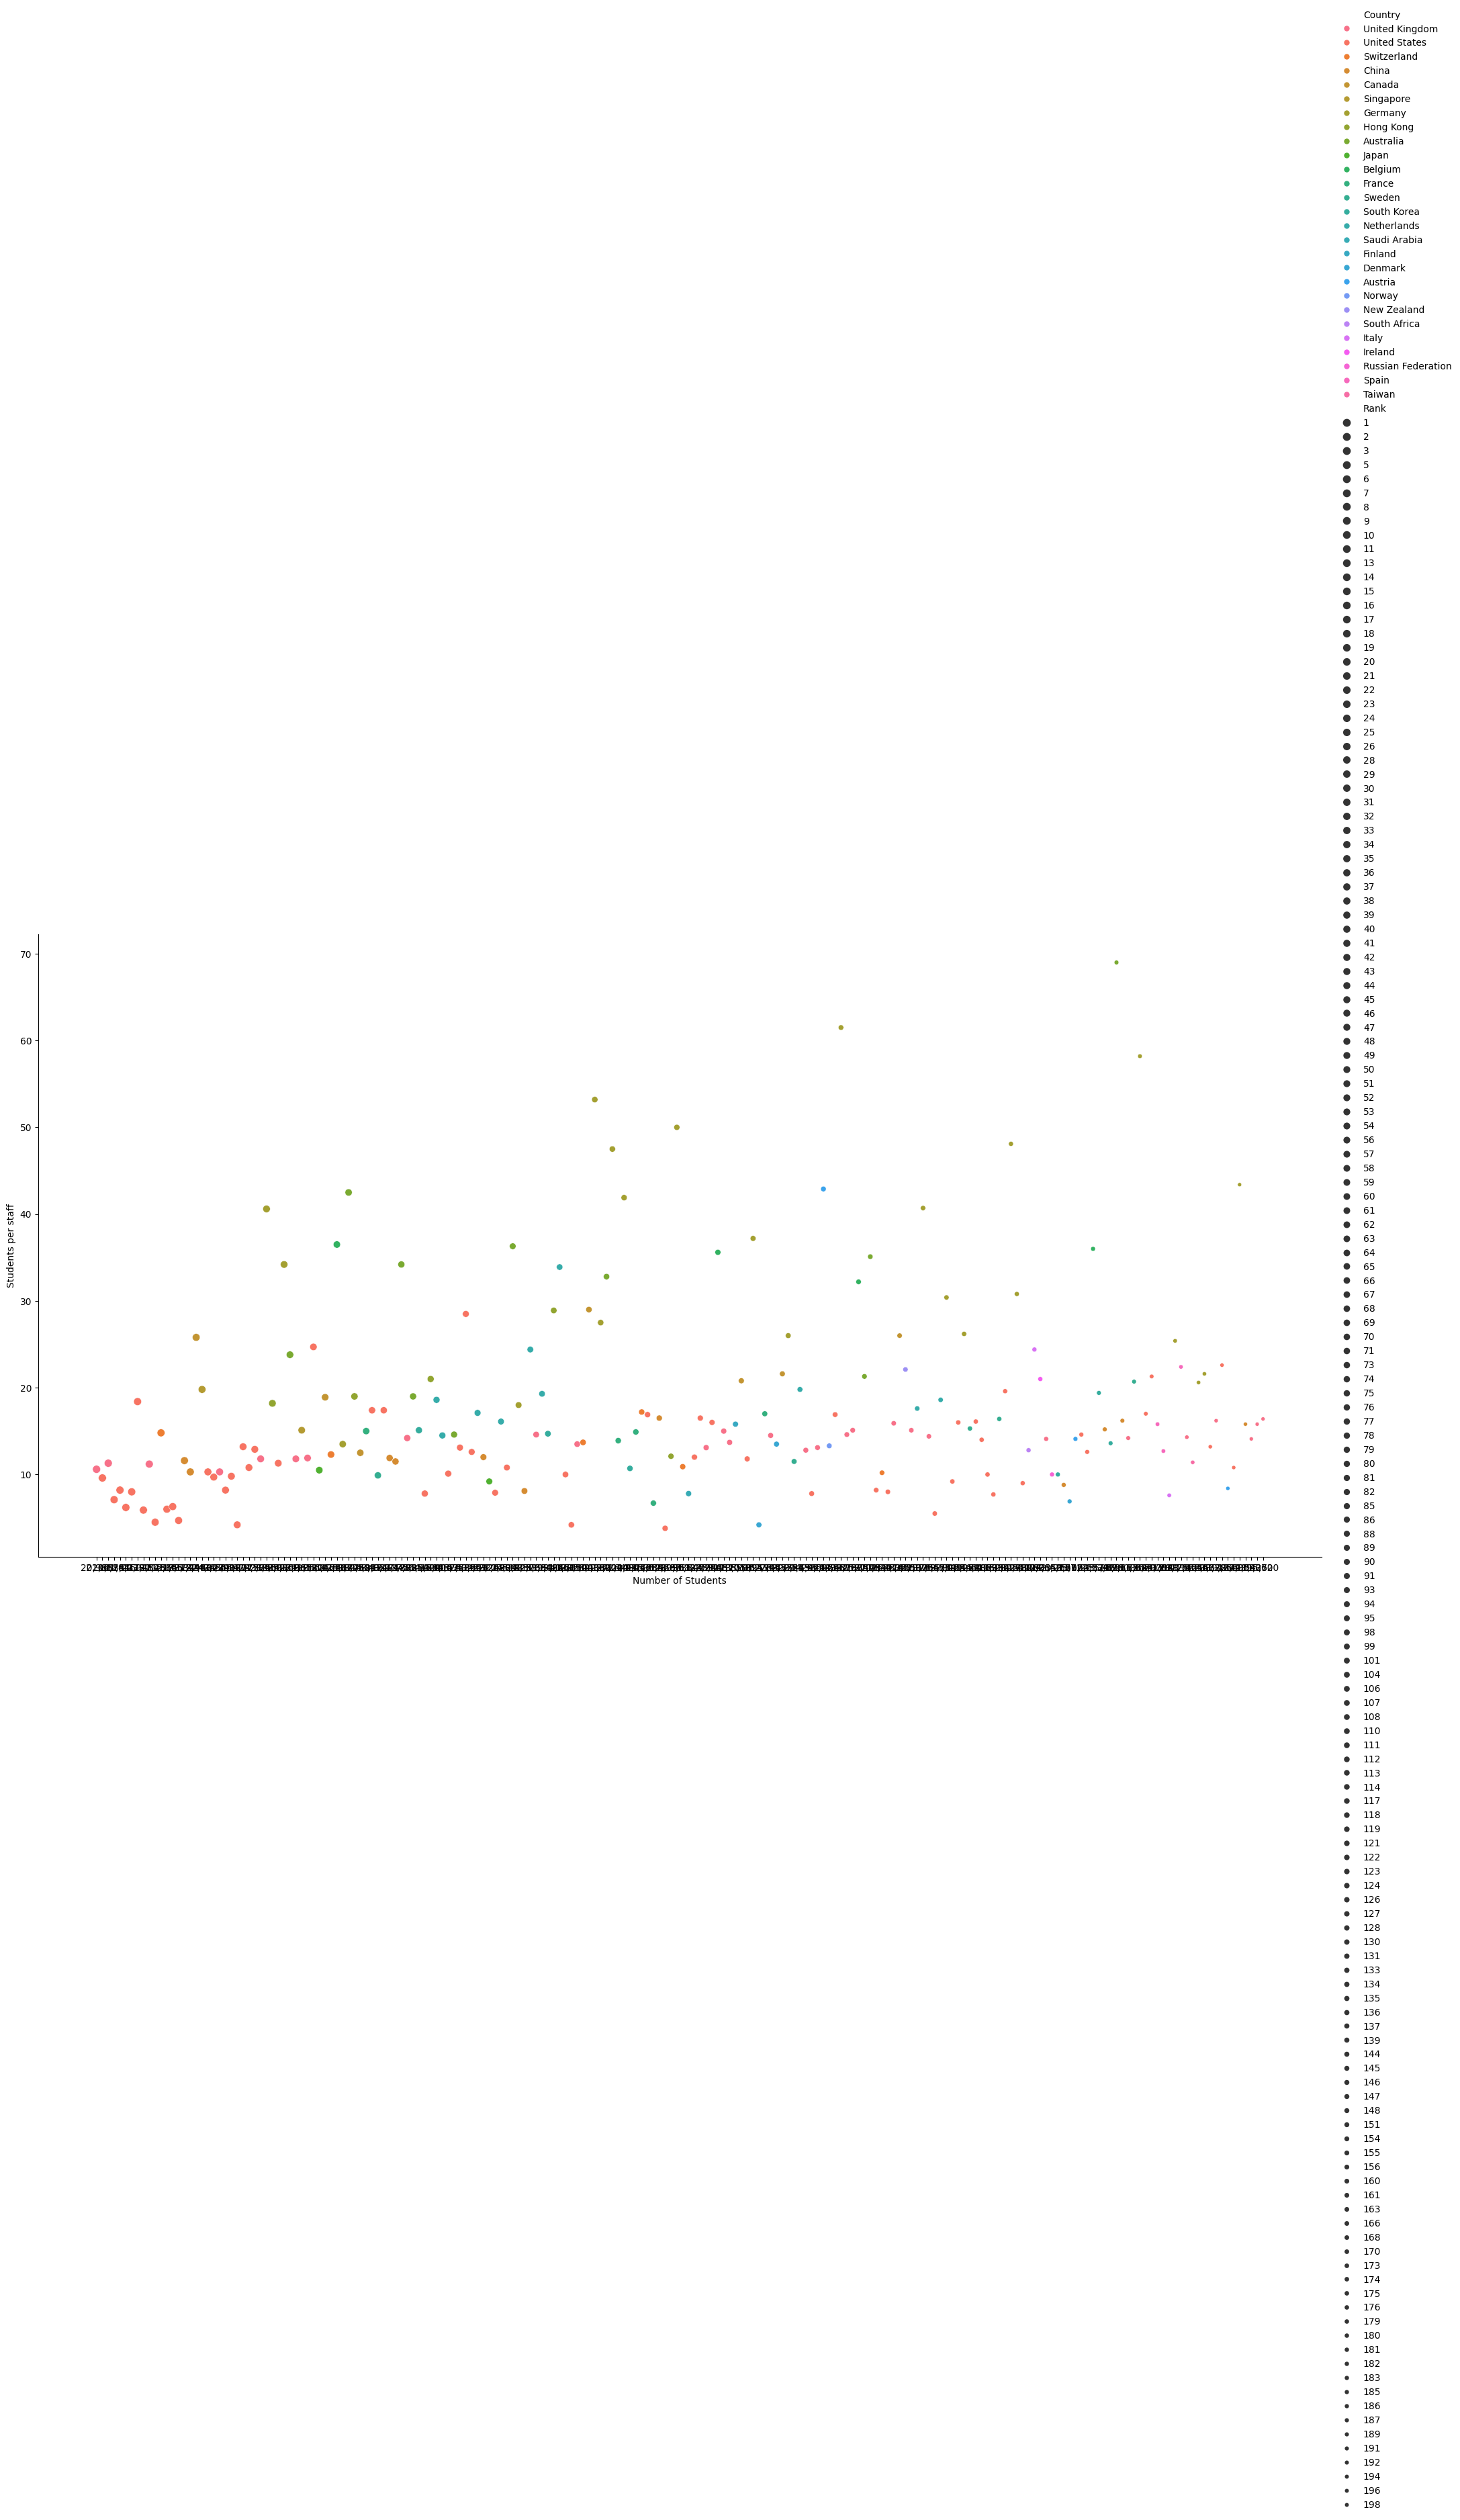

In [31]:
sns.relplot(x="Number of Students",y="Students per staff",data=df[:200],height=10,aspect=2,size="Rank",hue="Country");

## Subplots

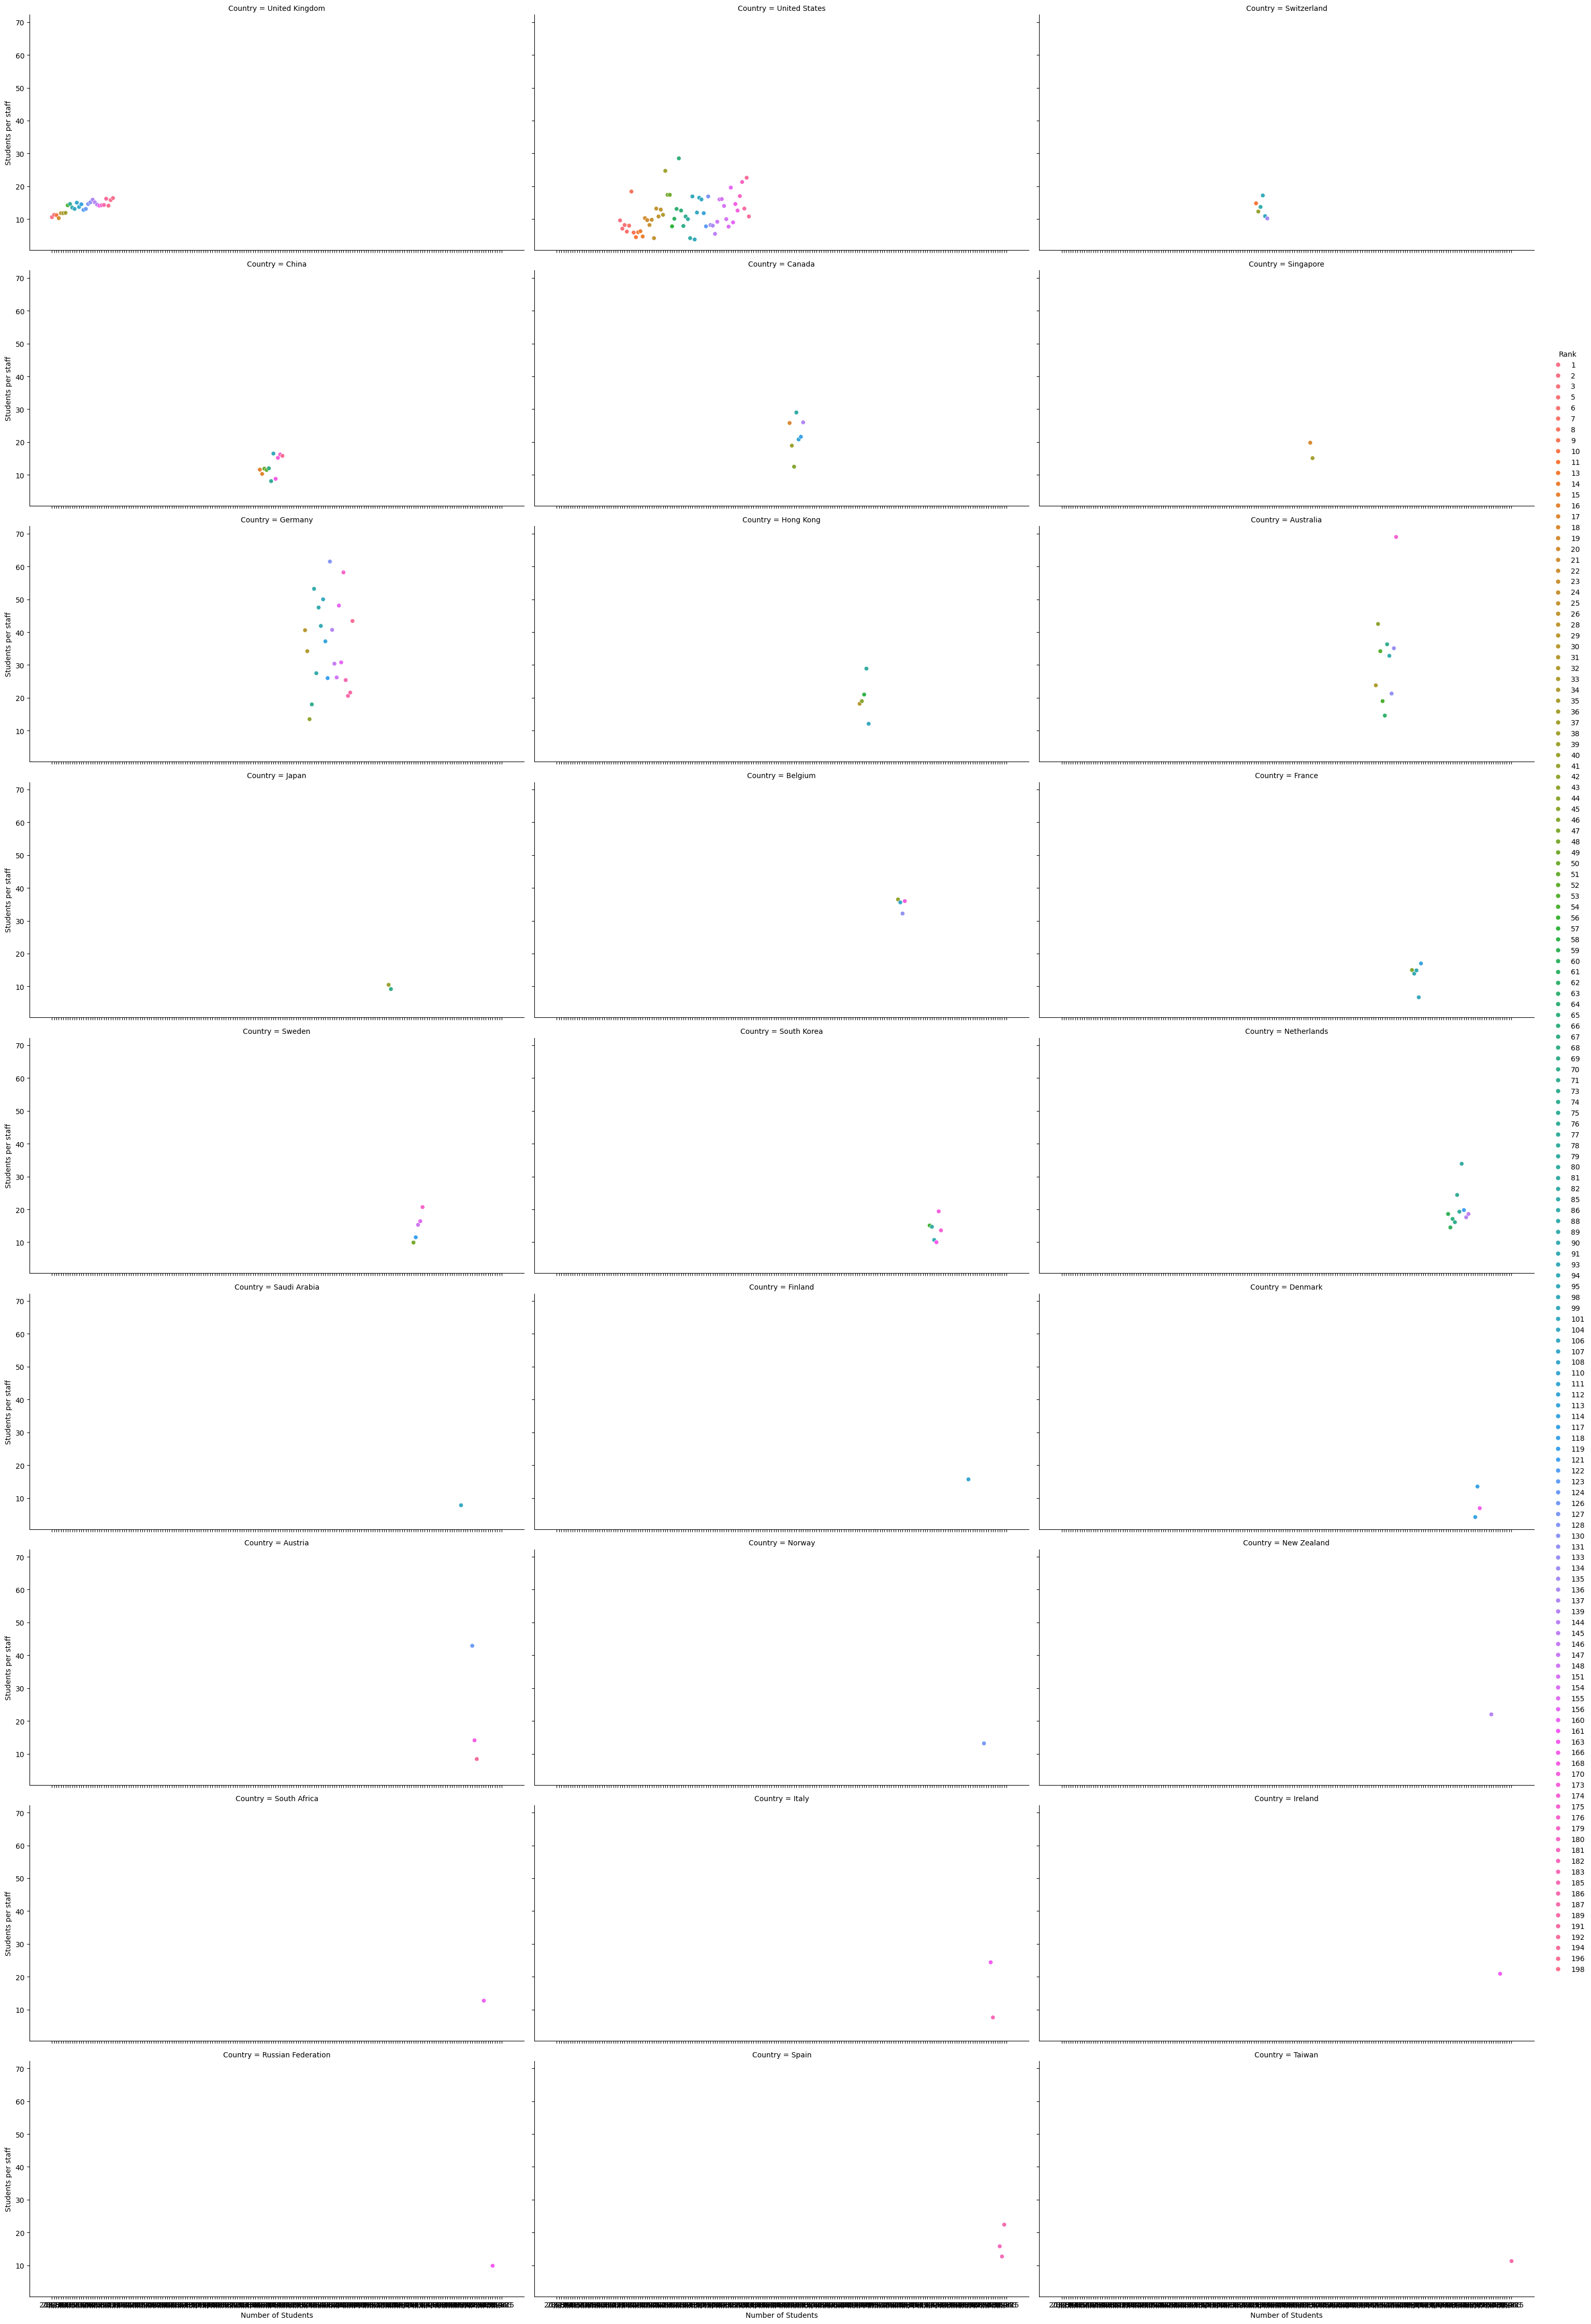

In [32]:
sns.relplot(x="Number of Students",y="Students per staff",hue="Rank",col="Country",col_wrap=3,data=df[:200],height=5,aspect=2);

### Strip Plot

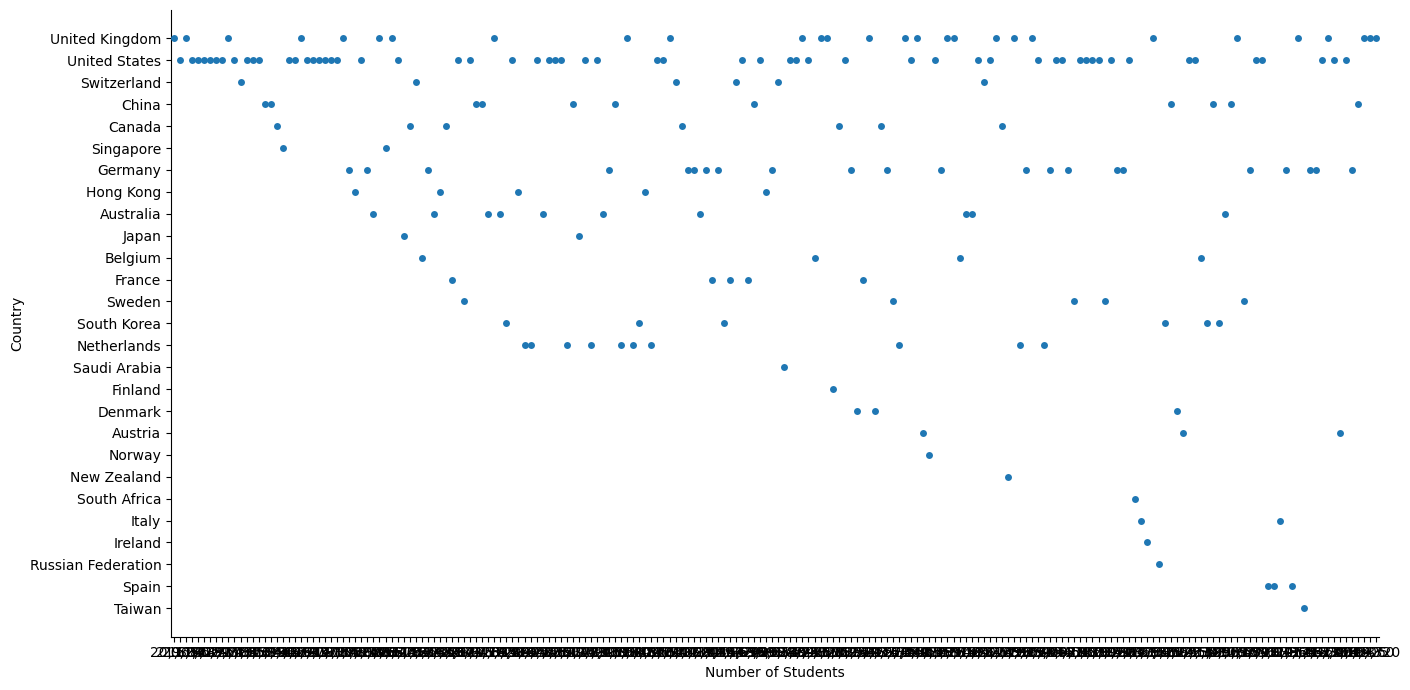

In [33]:
sns.catplot(x="Number of Students",y="Country",kind='strip',data=df[:200],height=7,aspect=2);

### Swarm Plot

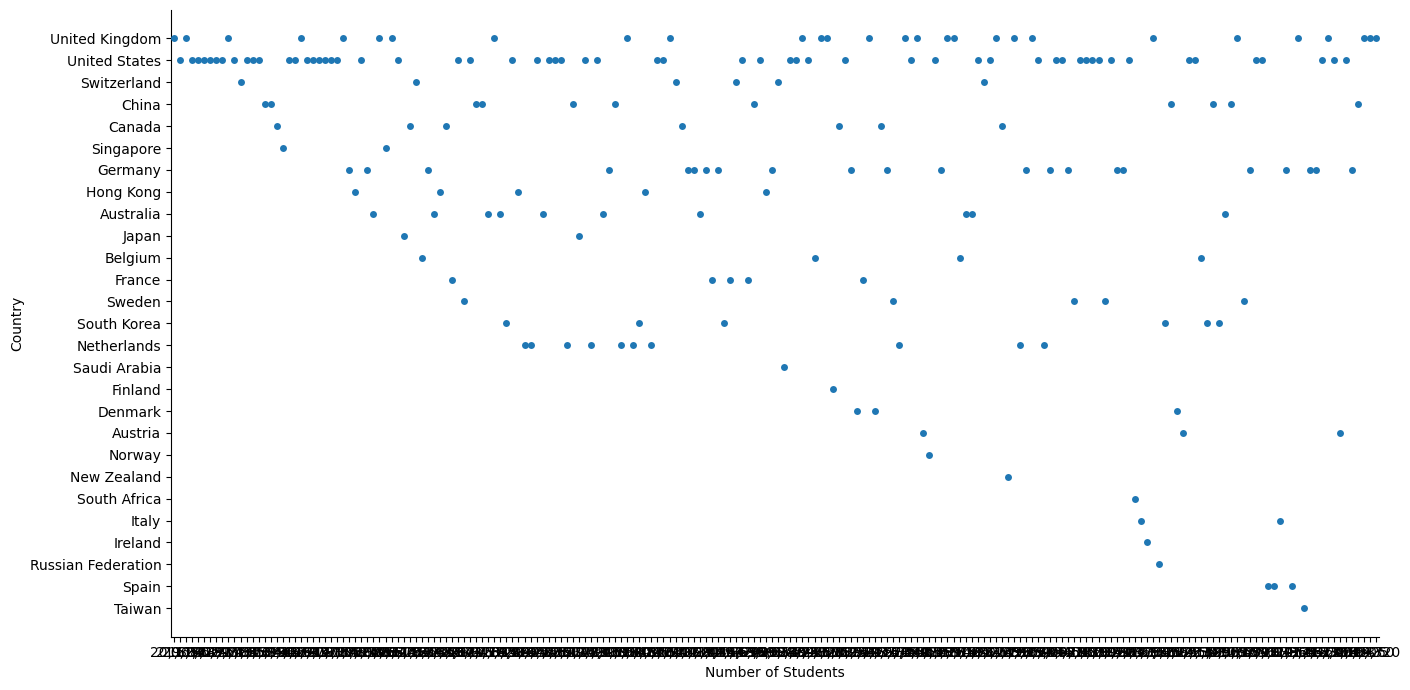

In [34]:
sns.catplot(x="Number of Students",y="Country",kind='swarm',data=df[:200],height=7,aspect=2);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



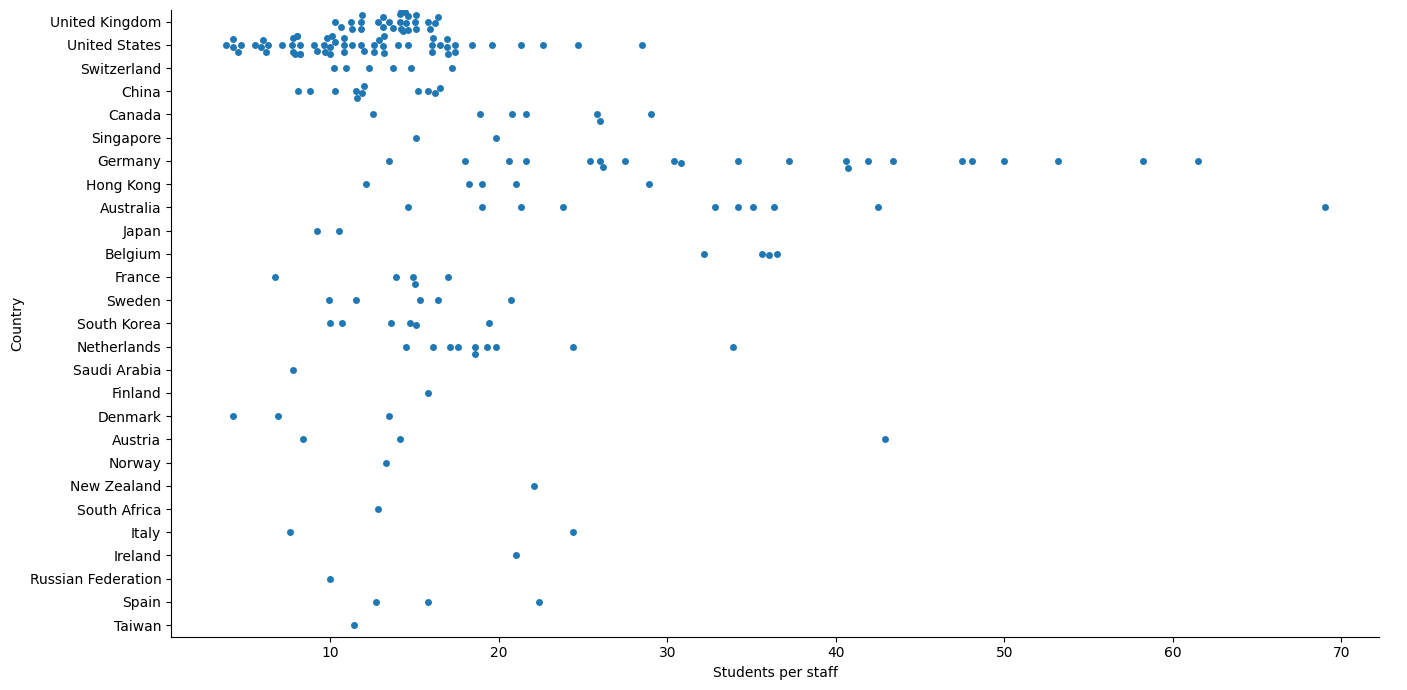

In [35]:
sns.catplot(x="Students per staff",y="Country",kind='swarm',data=df[:200],height=7,aspect=2);

## Density Plot

<ipython-input-36-615841620875>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




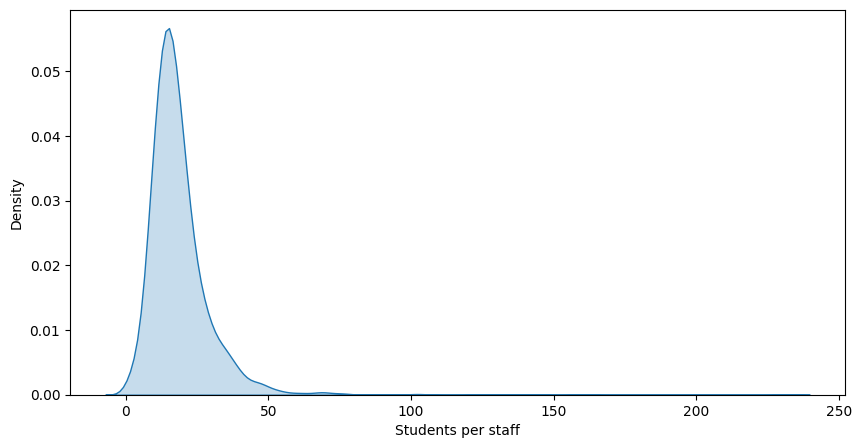

In [36]:
plt.rcParams["figure.figsize"] = (10,5)
sns.kdeplot(data=df['Students per staff'],shade=True);

#Download Clean Data


In [56]:
df.to_csv("cleaned_university_rankings.csv", index=False, encoding='utf-8-sig')